## Let us see the terrorist events in NEPAL

Nepal went through a major military political war for ten years since 1996 to 2006. The war was conducted by a communist political party with Maoist political ideology as its main belief named  Communist Party of Nepal (Maoist) (CPN-M) and led by its Supreme commander at the time - Prachanda. The entire war was led by Prachanda but the party name was changed many times during the war. They fought against the government and kingdom at the time for the establishment of republican in the country along with many other political and socio-economical demands. They ultimately ended the war through the peace process that followed the establishment of republican country as well as constitution assembly election that restructured the country with federalism and also secured rights of many of the oppressed ethnic groups in the country.

Beside the above major military political war, there are many small violent political groups they have done small terrorist type events over different parts of the country. Their impacts are almost negligible with few minor incidents. Many of them have ended their war through dialogues with the government after their demands are addressed or partially addressed.

In this notebook, we will analyse the terrorist incidents data that occurred only in Nepal. We will study the data into deeper to illuminate the incidents and their impact through visulizations.

In [1]:
# Standard Libraries Import
import math, os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the basemap package
from mpl_toolkits.basemap import Basemap
from IPython.display import set_matplotlib_formats
from mpl_toolkits import basemap

In [2]:
# Turn on retina display mode
set_matplotlib_formats('retina')
# turn off interactive mode
plt.ioff()

In [3]:
df = pd.read_excel("gtd_95to12_0617dist.xlsx", sheetname=0)

In [4]:
df_nepal = df[df['country_txt'] == 'Nepal']
df_nepal[['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'provstate', 'latitude',  'longitude', 'gname', 'nkill']].head()

,eventid,iyear,imonth,iday,country_txt,provstate,latitude,longitude,gname,nkill
3585,199602270003,1996,2,27,Nepal,Mid-Western,28.743442,82.475276,Unknown,6.0
4670,199607170003,1996,7,17,Nepal,Central,27.718332,85.325337,Unknown,0.0
6007,199612120001,1996,12,12,Nepal,Central,27.718332,85.325337,National People's Movement Coordination Committee,0.0
6008,199612120002,1996,12,12,Nepal,Central,27.718332,85.325337,National People's Movement Coordination Committee,0.0
6009,199612120003,1996,12,12,Nepal,Central,27.718332,85.325337,National People's Movement Coordination Committee,0.0


In [5]:
# the total number of incidents occurred in Nepal

df_nepal.shape

(746, 135)

In [6]:
# Since Communist Party of Nepal- Maoist (CPN-M) and Maoists are same groups, combining them

df_nepal['gname'] = df_nepal['gname'].replace('Communist Party of Nepal- Maoist (CPN-M)', 'Maoists')

/home/rabindra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Plotting the events location in the actual map of Nepal

Using the Basemap, we can plot the incidents in the actual map with the longitude and latitude of the place where the incident happened.

/home/rabindra/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/rabindra/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/rabindra/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


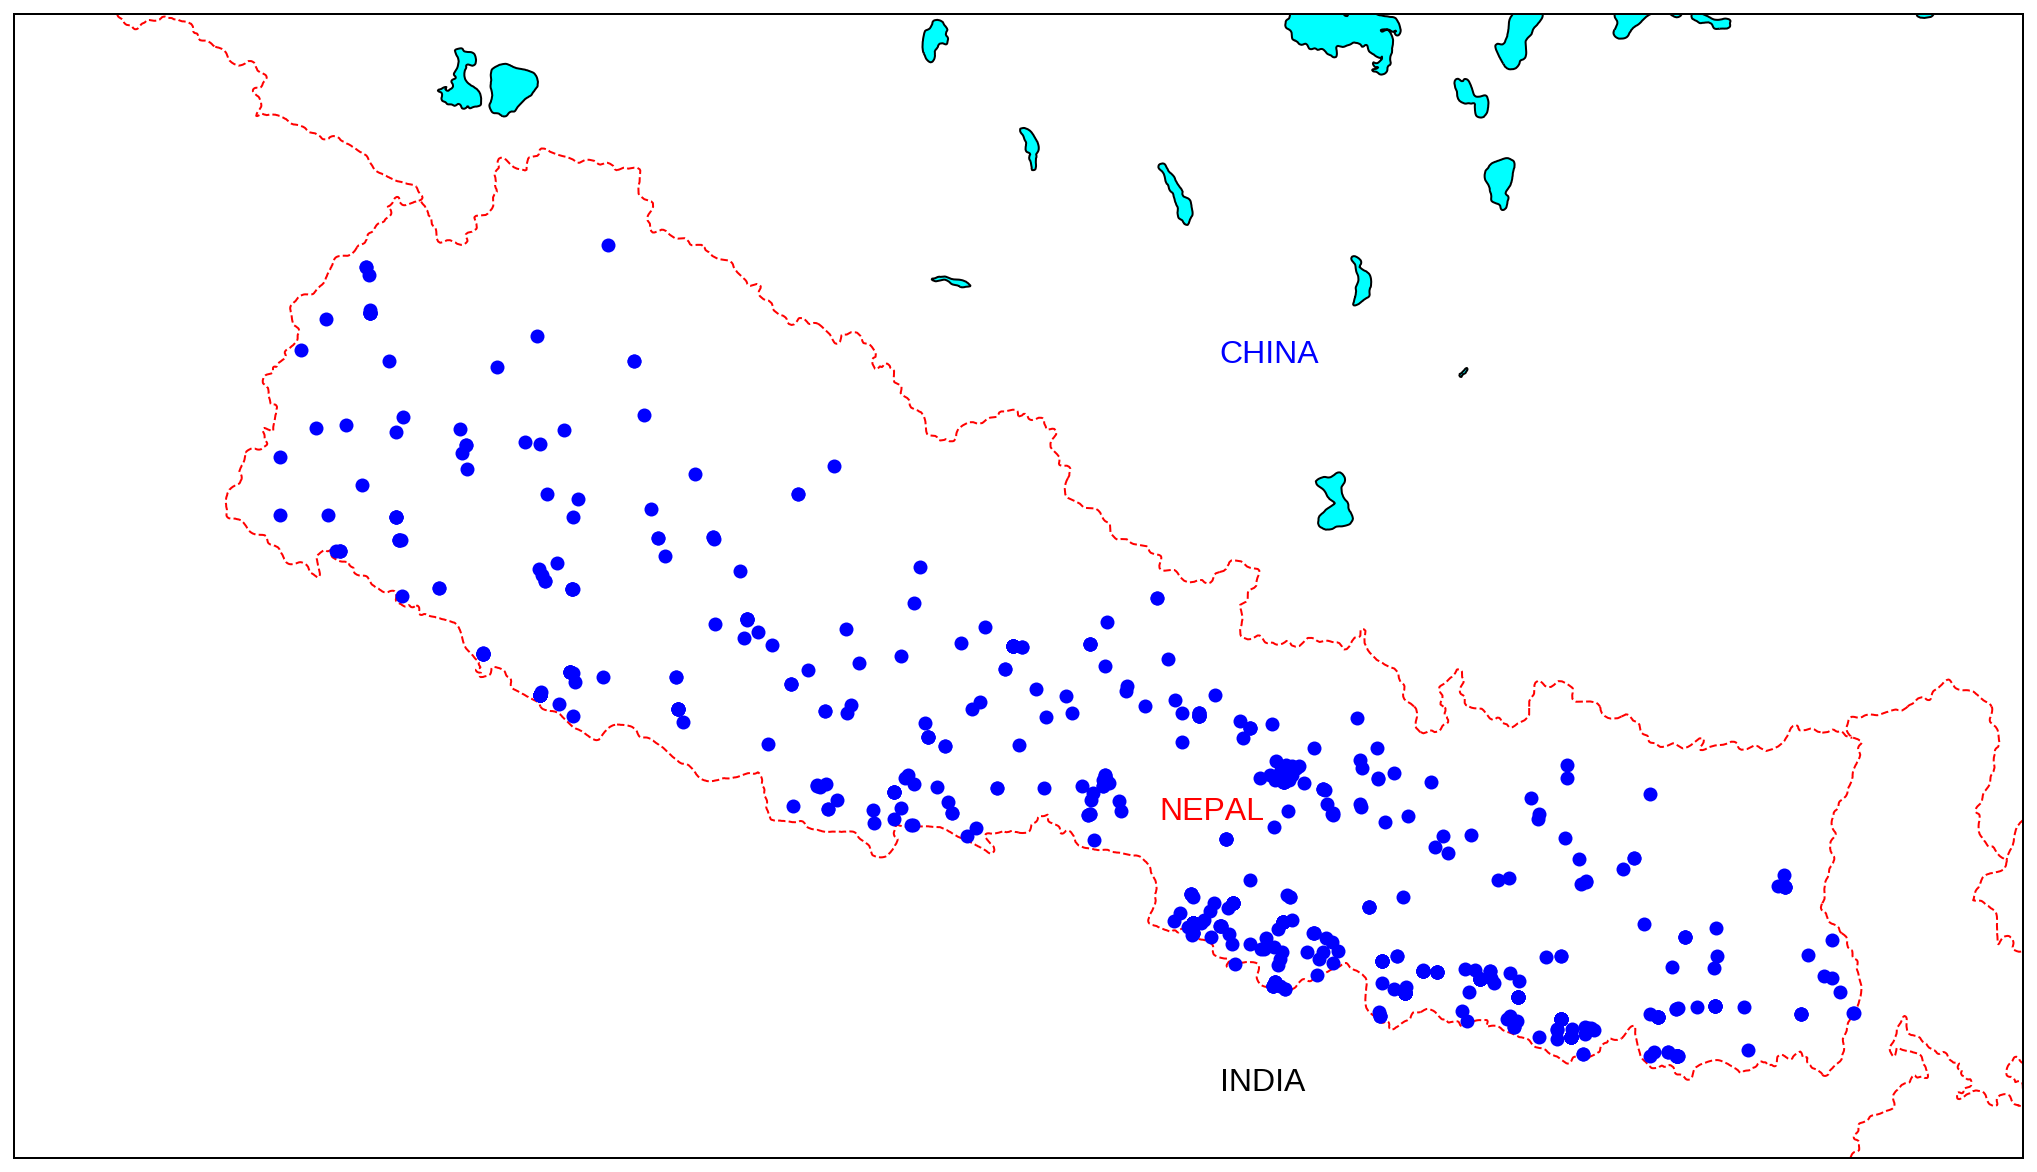

In [7]:
# kathmandu coordinate : to keep the center of the map around Kathmandu
lon_0 = 85; lat_0 = 27
nepal = Basemap(projection='merc', area_thresh = 0.1, resolution='f',
                lat_0=lat_0,lon_0=lon_0,
                llcrnrlon=79,
                llcrnrlat=26.0,
                urcrnrlon=89,
                urcrnrlat=31.0)

fig = plt.figure(figsize=(18,12))

nepal.drawmapboundary(fill_color='aqua')

# Draw coastlines, and the edges of the map.
nepal.drawcoastlines(color='black')
nepal.fillcontinents(color='white', lake_color='aqua')
nepal.drawcountries(linewidth=1, linestyle='dashed' ,color='red')

# plotting the latitude, longitude data points in the map
xs, ys = list(df_nepal['longitude'].astype(float)), list(df_nepal['latitude'].astype(float))
x, y = nepal(xs, ys)
nepal.plot(x, y, 'bo')
plt.text(nepal(85, 29.5)[0], nepal(85, 29.5)[1], 'CHINA', fontsize=16, color='blue')
plt.text(nepal(84.7, 27.5)[0], nepal(84.7, 27.5)[1], 'NEPAL', fontsize=16, color='red')
plt.text(nepal(85, 26.3)[0], nepal(85, 26.3)[1], 'INDIA', fontsize=16, color='black')
plt.show()

In [8]:
# list of associated groups in Nepal

terror_groups = df_nepal['gname'].unique().tolist()
terror_groups[:10]

['Unknown',
 "National People's Movement Coordination Committee",
 'Maoists',
 'Communist Party of Nepal- Unified Marxist-Leninist (CPN-UML)',
 'Nepali Congress Party (NC)',
 'Harakat ul-Mujahidin (HuM)',
 'Left-wing extremists',
 'All Nepal National Free Student Union-Revolutionary',
 'Anti-Government Guerrillas',
 'Maoist Communist Center (MCC)']

In [9]:
# creating a new DataFrame with group_name and total_events done by the group as two columns

my_dict = dict(df_nepal['gname'].value_counts())
group_events_df = pd.DataFrame(columns=['group_name', 'total_events'])

In [10]:
# adding the rows in the dataframe 
# Gropus causing less than 10 events will be merged into a new group: OTHERS
total_others_events = 0
for i, group in enumerate(terror_groups):
    total_events = my_dict[group]
    if total_events > 9:
        group_events_df.loc[i] = [group, total_events]
    else:
        total_others_events += total_events
        
# adding the new group: OTHERS
group_events_df.loc[i+1] = ['OTHERS', total_others_events]

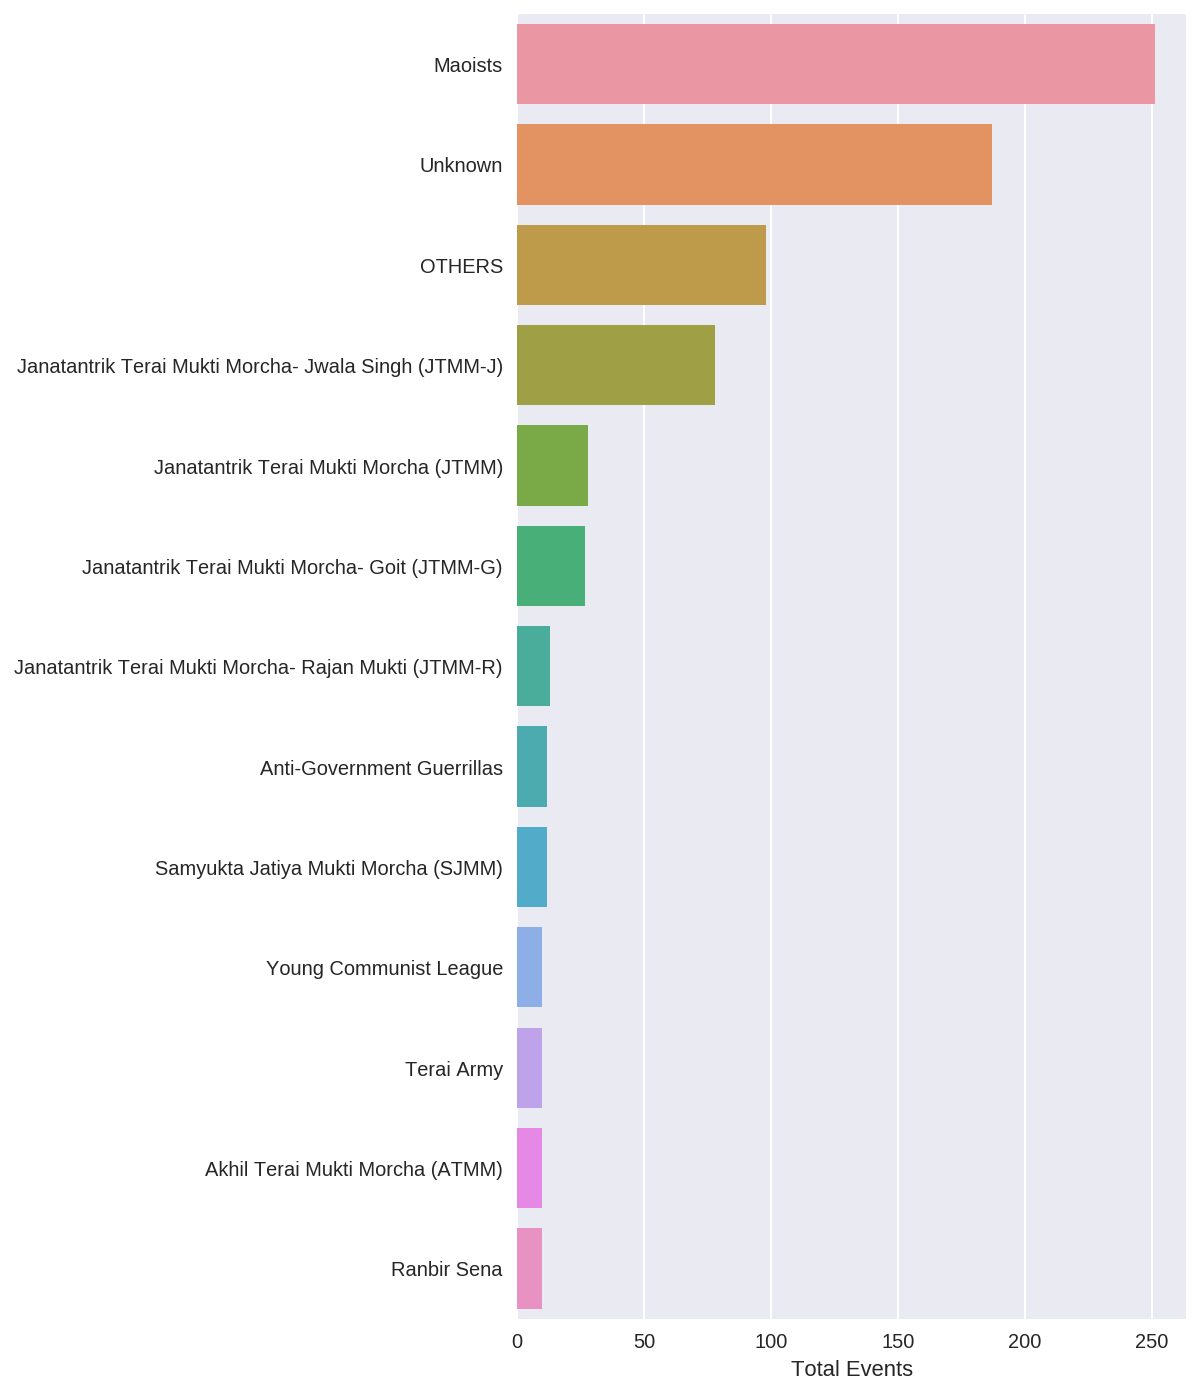

In [11]:
# Now plotting the bar plot 
fig, ax = plt.subplots(figsize=(6, 12))
sns.barplot(x='total_events', y = 'group_name', data = group_events_df.sort_values('total_events', ascending=False))
ax.set(xlabel="Total Events", ylabel="")
plt.show()

### Number of deaths

Let us explore the number of deaths of the innocent people as well as those in the perpetrator side. 

In [12]:
df_nepal['nkillter'].head()

3585   NaN
4670   NaN
6007   NaN
6008   NaN
6009   NaN
Name: nkillter, dtype: float64

In [13]:
# Finding the number of people killed by each of the group (nkill_group)
# and the number of people killed on their side (nkillter_group)

def num_killed_group(df = df_nepal):     # number of people killed by each group
    
    nkill_group_dict, nkillter_group_dict = dict(), dict()
    for group in terror_groups:
        nkill_group, nkillter_group = 0, 0
        for i in range(df.shape[0]):
            if df['gname'].tolist()[i] == group:
                if pd.isnull(df['nkill'].tolist()[i]): continue
                else: nkill_group += df['nkill'].tolist()[i]

            if df_nepal['gname'].tolist()[i] == group:
                if pd.isnull(df['nkillter'].tolist()[i]): continue
                else: nkillter_group += df['nkillter'].tolist()[i]

        nkill_group_dict[group] = nkill_group
        nkillter_group_dict[group] = nkillter_group
        
    return nkill_group_dict, nkillter_group_dict

In [14]:
nkill_group_dict, nkillter_group_dict = num_killed_group(df_nepal)

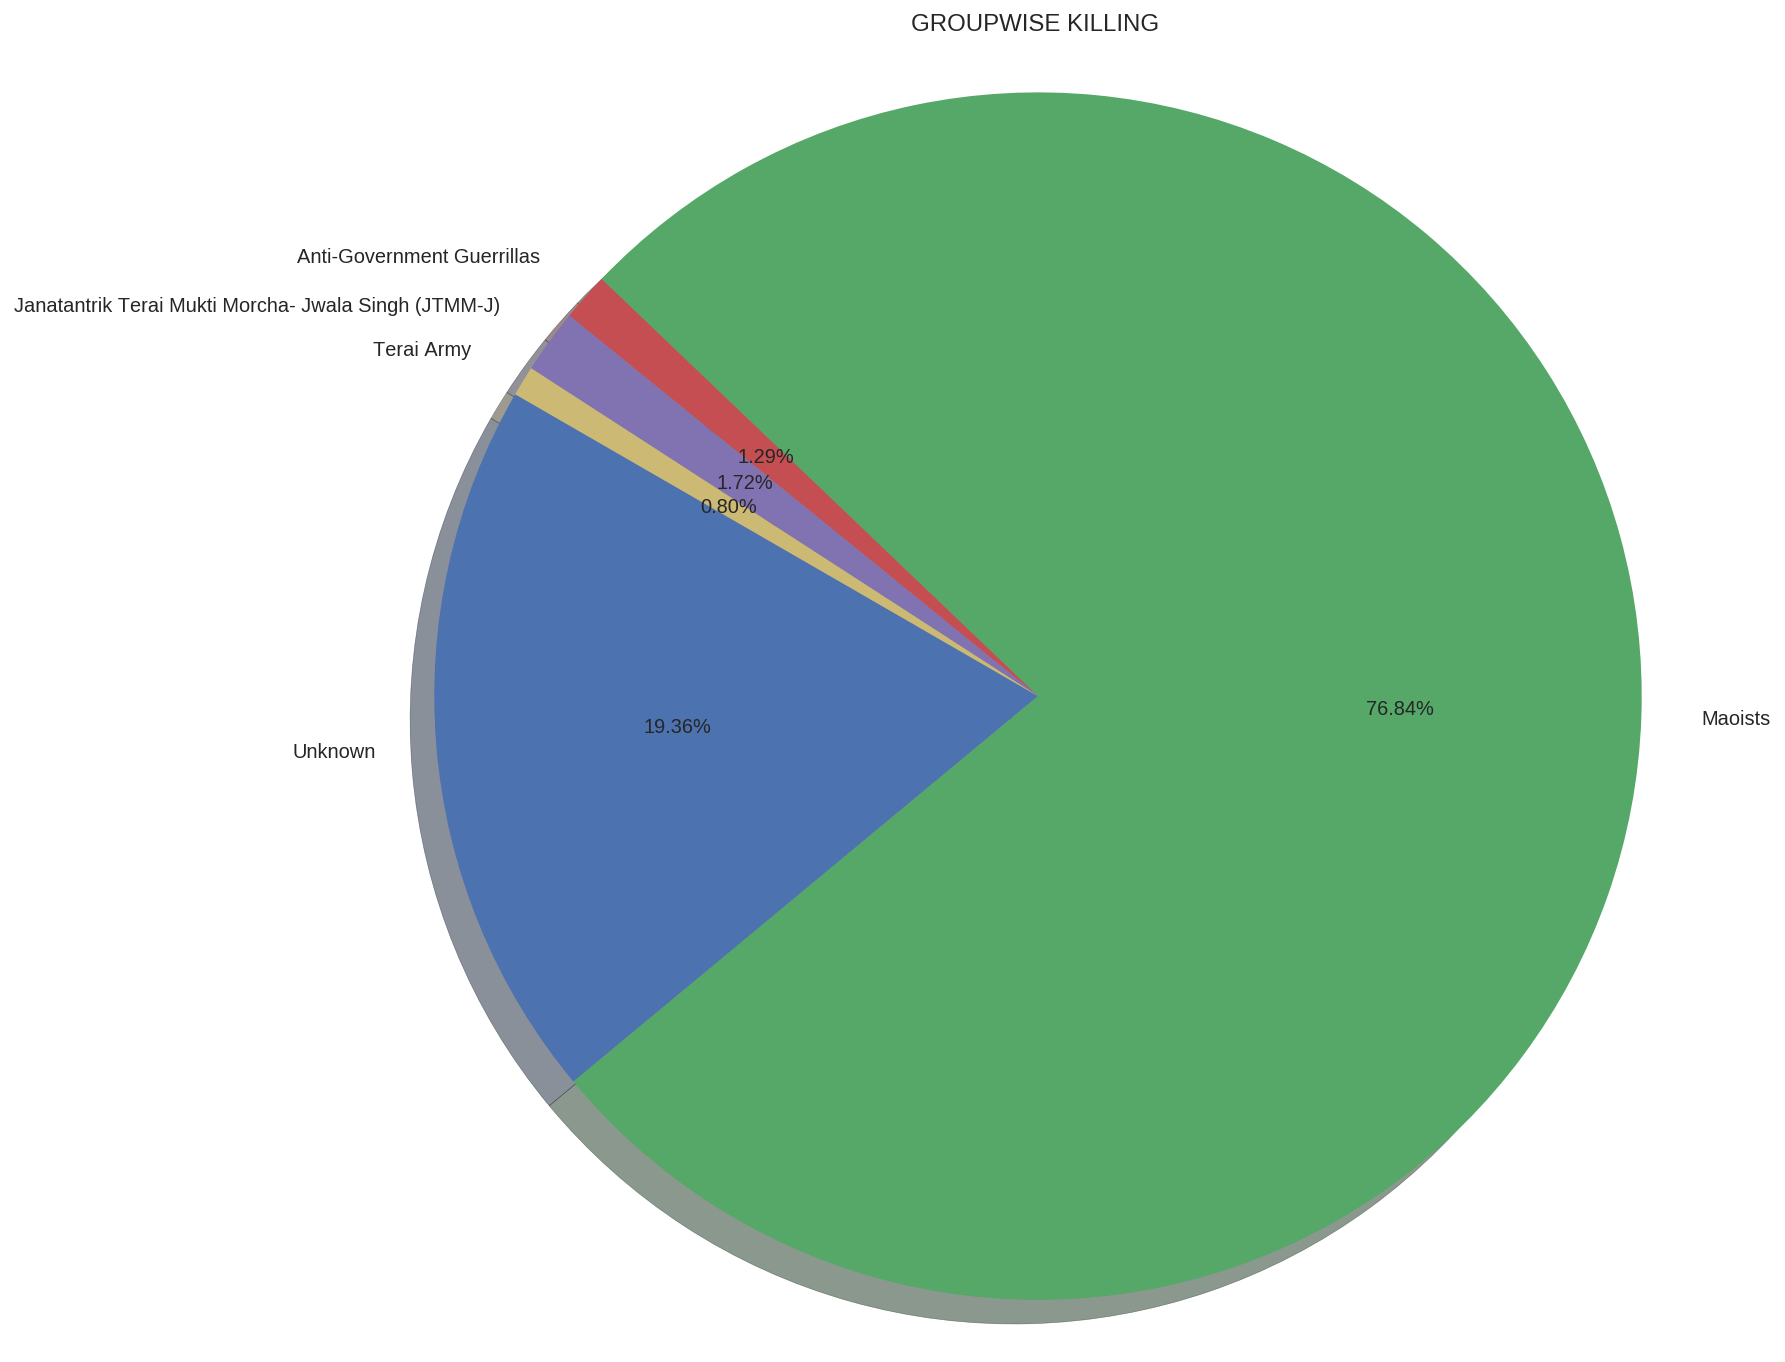

In [15]:
# Plotting the piechart of number of killings by each groups

n_killed, groups = [], []
for group in list(nkill_group_dict.keys()):
    nkilled = nkill_group_dict[group]
    if nkilled < 15: continue
    n_killed.append(nkilled)
    groups.append(group)
    
plt.figure(figsize=(12,12))
plt.pie(n_killed, labels=groups, autopct='%1.2f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('GROUPWISE KILLING')
plt.show()

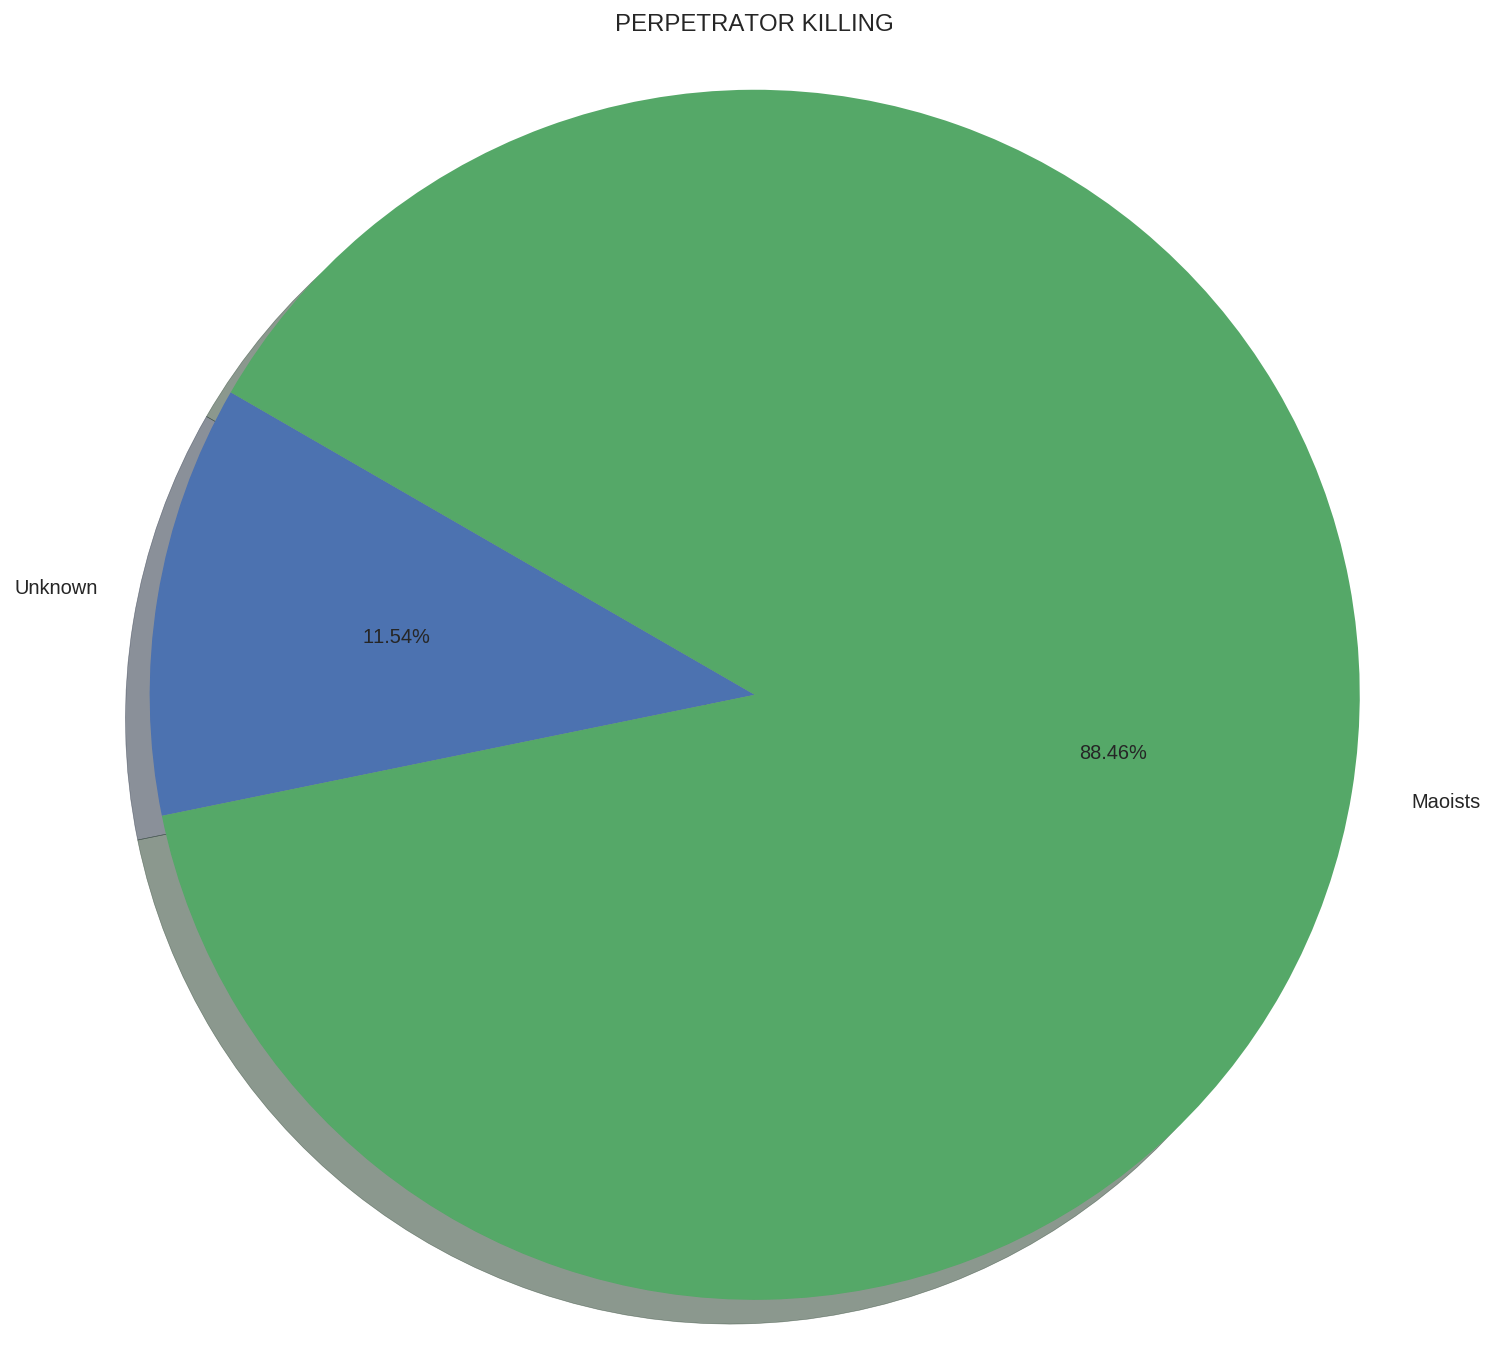

In [16]:
# Plotting the piechart of number of killings by each groups

nter_killed, groups = [], []
for group in list(nkillter_group_dict.keys()):
    nkilled = nkillter_group_dict[group]
    if nkilled < 15: continue
    nter_killed.append(nkilled)
    groups.append(group)
    
plt.figure(figsize=(12,12))
plt.pie(nter_killed, labels=groups, autopct='%1.2f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('PERPETRATOR KILLING')
plt.show()

In [17]:
# creating a temporary DataFrame for the plotting data preparation

tmp_df = pd.DataFrame(columns = ['group', 'nkill', 'nkillter'])

# adding group column
tmp_df['group'] = nkill_group_dict.keys()

# adding nkill column
tmp_df['nkill'] = nkill_group_dict.values()

# adding nkillter columns
tmp_df['nkillter'] = nkillter_group_dict.values()

In [18]:
tmp_df = tmp_df.sort_values(['nkill', 'nkillter'], ascending=[False, False])[:10]

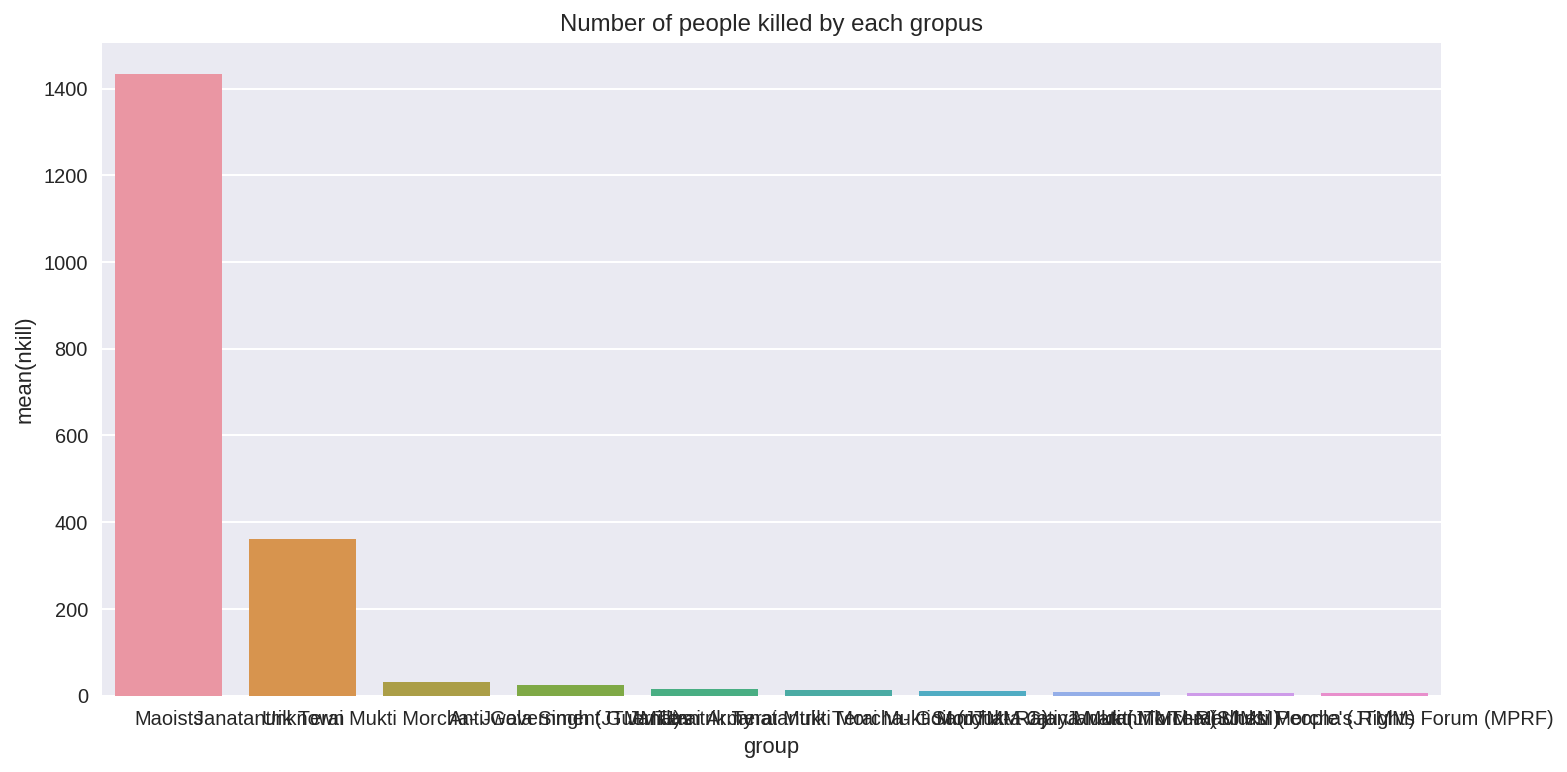

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x='group', y='nkill', data=tmp_df)
plt.title('Number of people killed by each gropus')
plt.show()

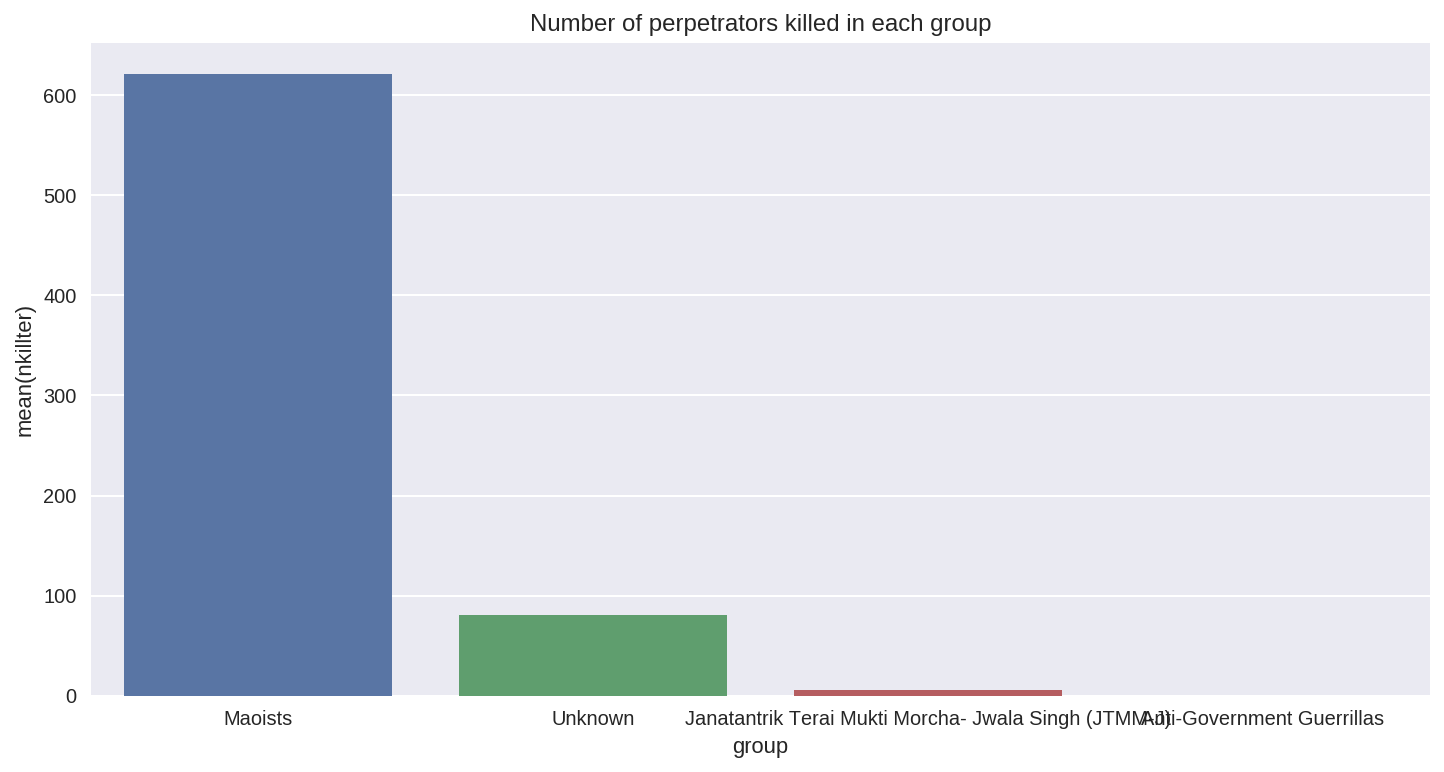

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='group', y='nkillter', data=tmp_df[:4])
plt.title('Number of perpetrators killed in each group')
plt.show()